In [105]:
import json
import json
import pickle
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
# %config InlineBackend.figure_format = 'retina'

# import os
# import sys
# import operator

import numpy as np
import pandas as pd
from math import log, log10
# import scipy.stats as scs
# import matplotlib.pyplot as plt
# import seaborn as sns
# import matplotlib.dates as mdates
# %matplotlib inline
# import json

# model imports
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split


# # model evaluation imports
# from sklearn import model_selection, preprocessing, ensemble
# from sklearn.metrics import log_loss
# from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import KFold


import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords 
from nltk.stem.wordnet import WordNetLemmatizer
import string
from nltk.stem.snowball import SnowballStemmer
from gensim import corpora, models, similarities

from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics.pairwise import linear_kernel
from sklearn import linear_model
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

import matplotlib.pyplot as plt
from sklearn.manifold import MDS

from gensim.models.coherencemodel import CoherenceModel
from sklearn.decomposition import NMF


from gensim.models.ldamodel import LdaModel
from gensim.corpora.dictionary import Dictionary
import pyLDAvis.gensim

 
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist

from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC

from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF


In [2]:
def load_df(filename):
    with open(filename, 'rb') as f:
            print("Loading picked")
            return pickle.load(f)

def pickle_df(df, filename="./df.pickle"):
    if filename:
        print("Writing to", filename)
        with open(filename, "wb") as output_file:
                pickle.dump(df, output_file, protocol=4)

In [6]:
df = load_df("df_ing_9_23.pickle")

Loading picked


In [7]:
stop = stopwords.words('english')

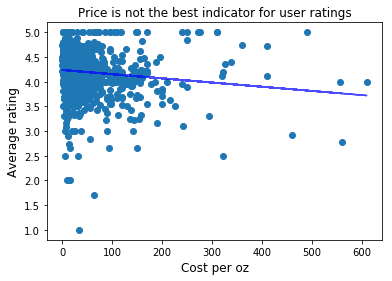

In [26]:
df_graph = df.dropna(axis=0, how='any')
x = df_graph['cost_per_oz'].values
y = df_graph['rating'].values
plt.plot(x, y, 'o', )

plt.title('Per unit price vs. Average rating')

plt.xlabel('Cost per oz', fontsize =12)
plt.ylabel('Average rating', fontsize =12)

z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"b-", alpha = 0.1)


plt.show()

In [91]:
df_doc = load_df("df_reviews_only.pickle")

Loading picked


In [35]:
## TF-IDF and NMF to display topics
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic %d: " % (topic_idx), end="")
        print(" ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))

#no_features = 1000

stop = stopwords.words('english')

In [111]:
exclude = set(string.punctuation) 
stop = list(exclude) + stopwords.words('english')
snowball = SnowballStemmer('english')
lemma = WordNetLemmatizer()
tokenizer = RegexpTokenizer(r'\w+')

def clean(doc):
    tokens = " ".join(nltk.word_tokenize(doc)).lower()
    stop_free = " ".join([i for i in tokens.split() if i not in stop])
    normalized = " ".join(snowball.stem(word) for word in stop_free.split(" "))
    return normalized

In [48]:
doc_clean= [clean(doc) for doc in df_doc.rev_description]

In [50]:
doc_clean = pd.DataFrame(doc_clean)

In [51]:
doc_clean.to_pickle('doc_clean.pickle') 

In [65]:
doc_clean[0]

0                                 husband love anthony line
1                        amazing day moisturizer love smell
2         lotion would probably good clean shaven howeve...
3         bought husband disappointed read ingredient li...
4         husband used believe best men 's moisturizer s...
5         purchased hubby dry skin face nose area moistu...
6         dad somewhat sensitive dry skin really n't kno...
7         boyfriend treated shopping day sephora given s...
8         recently received sample moisturizer mail gave...
9         use product every morning every night quickly ...
10        absolutely love product used 2 year along eye ...
11        bought lotion based review one men 's magazine...
12        hand best men moisturizer market skin really c...
13        bought facial cleanser cleanser n't sap away m...
14        bought bf work skin dry skin thought moisturiz...
15        17 yr old son like this.what really hate matur...
16                      boyfriend 's ski

In [77]:
doc_clean[0]

0                                 husband love anthony line
1                        amazing day moisturizer love smell
2         lotion would probably good clean shaven howeve...
3         bought husband disappointed read ingredient li...
4         husband used believe best men 's moisturizer s...
5         purchased hubby dry skin face nose area moistu...
6         dad somewhat sensitive dry skin really n't kno...
7         boyfriend treated shopping day sephora given s...
8         recently received sample moisturizer mail gave...
9         use product every morning every night quickly ...
10        absolutely love product used 2 year along eye ...
11        bought lotion based review one men 's magazine...
12        hand best men moisturizer market skin really c...
13        bought facial cleanser cleanser n't sap away m...
14        bought bf work skin dry skin thought moisturiz...
15        17 yr old son like this.what really hate matur...
16                      boyfriend 's ski